Prediction AUC:  0.6580555555555555
prediction AUC:  0.6580555555555555
prediction AUC:  0.8241880341880342
prediction AUC:  0.8249358974358973
prediction AUC:  0.46233974358974356
prediction AUC:  0.5634615384615385
prediction AUC:  0.7286858974358975
prediction AUC:  0.6216346153846154


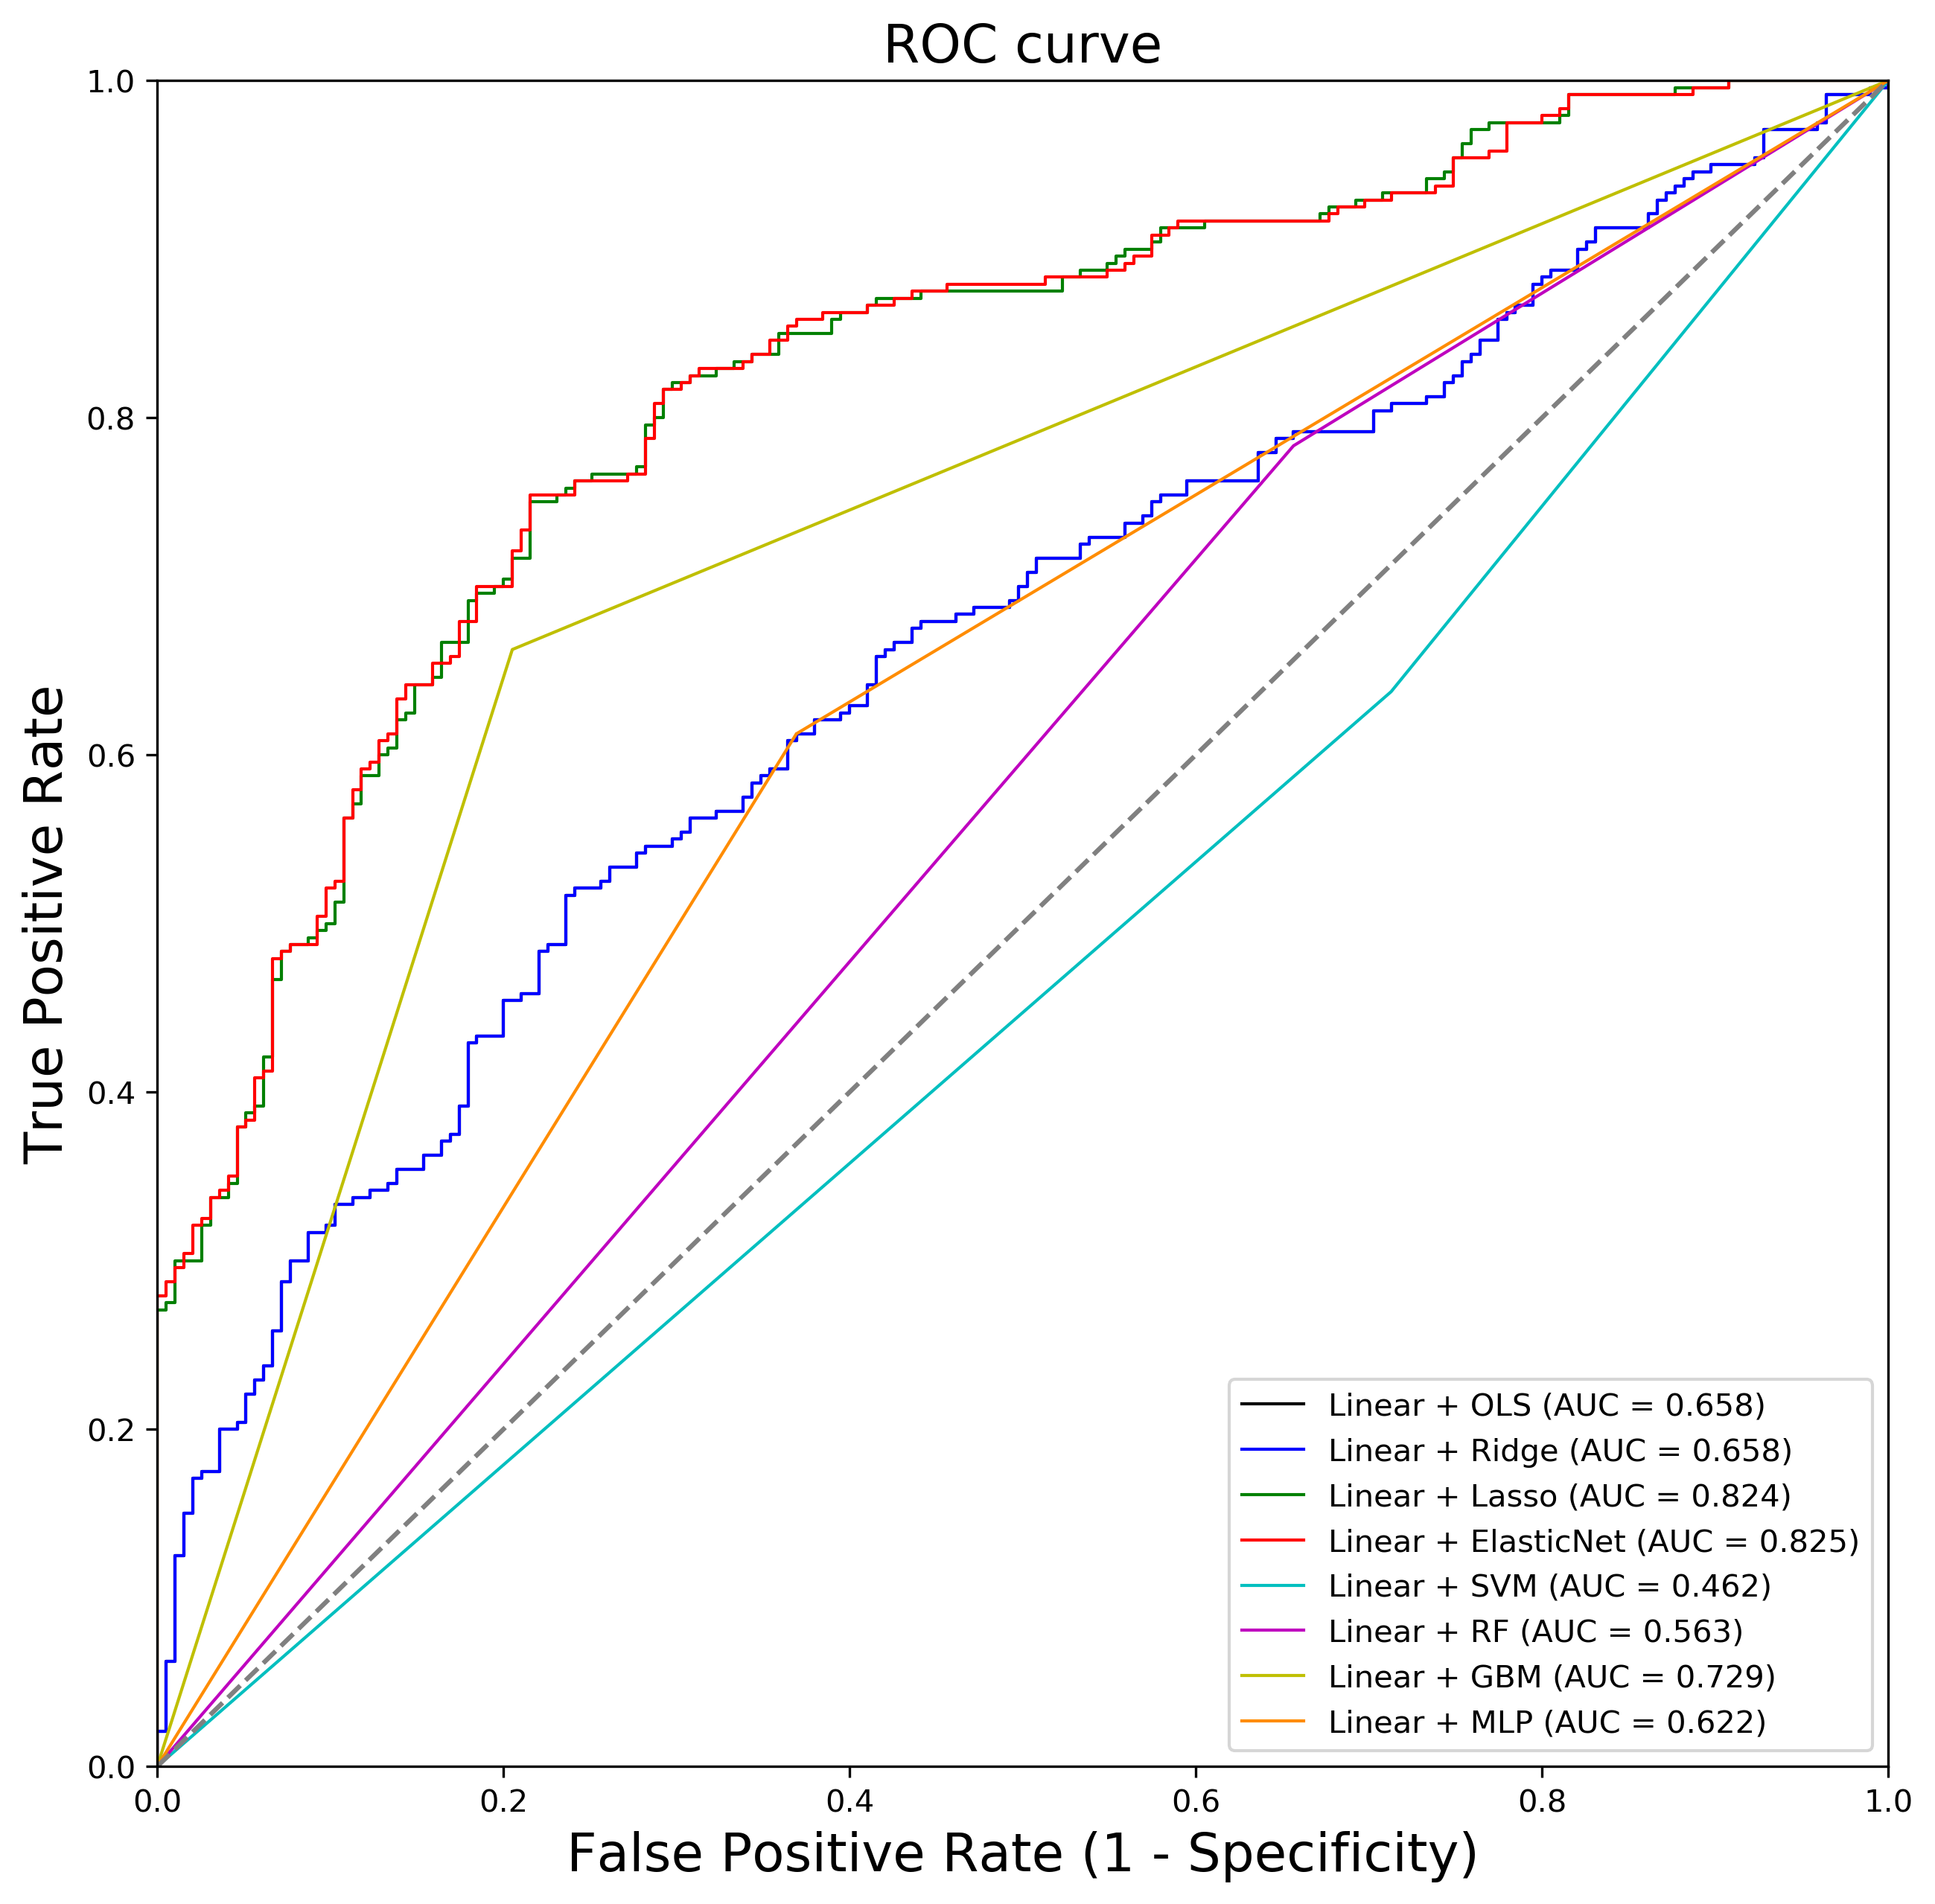

In [61]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

label = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/LBC21_smoking.csv", sep=",", header=0).iloc[:,-1].to_numpy()
ols = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/OLS.csv", sep=",", header=0).iloc[:,-1].to_numpy()
ridge = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/Ridge.csv", sep=",", header=0).iloc[:,-1].to_numpy()
lasso = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/Lasso.csv", sep=",", header=0).iloc[:,-1].to_numpy()
elnet = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/ElasticNet.csv", sep=",", header=0).iloc[:,-1].to_numpy()
svc = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/SVM.csv", sep=",", header=0).iloc[:,-1].to_numpy()
rf = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/RF.csv", sep=",", header=0).iloc[:,-1].to_numpy()
gbm = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/GBM.csv", sep=",", header=0).iloc[:,-1].to_numpy()
mlp_raw = pd.read_csv("/Users/qianxiaoyu/Desktop/smoke_final/predictions/MLP.csv", sep=",", header=0).iloc[:,-1]
mlp = []
for i in mlp_raw:
    x = int(str(i)[1])
    mlp.append(x)
mlp = np.array(mlp)

linr_fpr, linr_tpr, linr_threshold = roc_curve(label, ols)
linr_roc_auc = auc(linr_fpr, linr_tpr)
print("Prediction AUC: ",linr_roc_auc)

ridge_fpr, ridge_tpr, ridge_threshold = roc_curve(label, ridge)
ridge_roc_auc = auc(ridge_fpr, ridge_tpr)
print("prediction AUC: ",ridge_roc_auc)

lasso_fpr, lasso_tpr, lasso_threshold = roc_curve(label, lasso)
lasso_roc_auc = auc(lasso_fpr, lasso_tpr)
print("prediction AUC: ",lasso_roc_auc)

elnet_fpr, elnet_tpr, elnet_threshold = roc_curve(label, elnet)
elnet_roc_auc = auc(elnet_fpr, elnet_tpr)
print("prediction AUC: ",elnet_roc_auc)

svc_fpr, svc_tpr, svc_threshold = roc_curve(label, svc)
svc_roc_auc = auc(svc_fpr, svc_tpr)
print("prediction AUC: ",svc_roc_auc)

rf_fpr, rf_tpr, rf_threshold = roc_curve(label, rf)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("prediction AUC: ",rf_roc_auc)

gbm_fpr, gbm_tpr, gbm_threshold = roc_curve(label, gbm)
gbm_roc_auc = auc(gbm_fpr, gbm_tpr)
print("prediction AUC: ",gbm_roc_auc)

mlp_fpr, mlp_tpr, mlp_threshold = roc_curve(label, mlp)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)
print("prediction AUC: ",mlp_roc_auc)

lw = 1
plt.figure(figsize=[10,10], dpi=300)
plt.title('ROC curve', size= 17)
plt.plot(linr_fpr, linr_tpr, color = 'black', lw = lw, label = 'Linear + OLS (AUC = %0.3f)' % linr_roc_auc)
plt.plot(ridge_fpr, ridge_tpr, color = 'b', lw = lw, label = 'Linear + Ridge (AUC = %0.3f)' % ridge_roc_auc)
plt.plot(lasso_fpr, lasso_tpr, color = 'g', lw = lw, label = 'Linear + Lasso (AUC = %0.3f)' % lasso_roc_auc)
plt.plot(elnet_fpr, elnet_tpr, color = 'r', lw = lw, label = 'Linear + ElasticNet (AUC = %0.3f)' % elnet_roc_auc)
plt.plot(svc_fpr, svc_tpr, color = 'c', lw = lw, label = 'Linear + SVM (AUC = %0.3f)' % svc_roc_auc)
plt.plot(rf_fpr, rf_tpr, color = 'm', lw = lw, label = 'Linear + RF (AUC = %0.3f)' % rf_roc_auc)
plt.plot(gbm_fpr, gbm_tpr, color = 'y', lw = lw, label = 'Linear + GBM (AUC = %0.3f)' % gbm_roc_auc)
plt.plot(mlp_fpr, mlp_tpr, color = 'darkorange', lw = lw, label = 'Linear + MLP (AUC = %0.3f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--', color = 'grey')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', size= 17)
plt.xlabel('False Positive Rate (1 - Specificity)', size= 17)
plt.savefig("/Users/qianxiaoyu/Desktop/smoke_final/roc/linear_ROC.png")
plt.show()